In [1]:
!pip3.8 install pandas --user
!pip3.8 install yfinance --user
!pip3.8 install datetime --user
!pip3.8 install plotly --user

     |████████████████████████████████| 71kB 2.8MB/s eta 0:00:011
     |████████████████████████████████| 7.1MB 5.0MB/s eta 0:00:01
     |████████████████████████████████| 931kB 58.5MB/s eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 122kB 66.2MB/s eta 0:00:01
     |████████████████████████████████| 112kB 70.7MB/s eta 0:00:01
     |████████████████████████████████| 71kB 23.0MB/s eta 0:00:01
  Created wheel for peewee: filename=peewee-3.16.3-cp38-cp38-linux_x86_64.whl size=930894 sha256=1f1f3392dffb3040733d8e6c199198c74d2c198870e8205efc2c7bfda0fdf312
  Stored in directory: /home/jmoy001/.cache/pip/wheels/7a/f3/fc/50793842414f01441b07828a1d3659f5f003297b3ae9647cdd
Successfully built peewee
     |████████████████████████████████| 61kB 12.3MB/s eta 0:00:01
     |████████████████████████████████| 256kB 52.2MB/s eta 0:00:01
     |████████████████████████████████|

In [92]:
import pandas as pd
import yfinance as yf
import datetime
from datetime import date, timedelta
import plotly.graph_objects as go
import plotly.express as px
import numpy as np

In [7]:
import matplotlib.pyplot as plt

In [4]:
today = date.today()

d1 = today.strftime("%Y-%m-%d")
end_date = d1
d2 = date.today() - timedelta(days=365)
d1 = d2.strftime("%Y-%m-%d")
start_date = d2

amazon = yf.download('AMZN',
                   start=start_date,
                   end=end_date,
                   progress=False)

In [5]:
amazon["Date"] = amazon.index
amazon = amazon[["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume"]]
amazon.reset_index(drop=True, inplace=True)
print(amazon.head())

        Date        Open        High         Low       Close   Adj Close  \
0 2022-09-26  113.300003  117.339996  113.129997  115.150002  115.150002   
1 2022-09-27  117.199997  118.320000  113.050003  114.410004  114.410004   
2 2022-09-28  114.379997  118.699997  113.800003  118.010002  118.010002   
3 2022-09-29  115.599998  116.070000  113.059998  114.800003  114.800003   
4 2022-09-30  114.080002  116.919998  112.839996  113.000000  113.000000   

     Volume  
0  62723300  
1  60094700  
2  55763800  
3  58969700  
4  59479600  


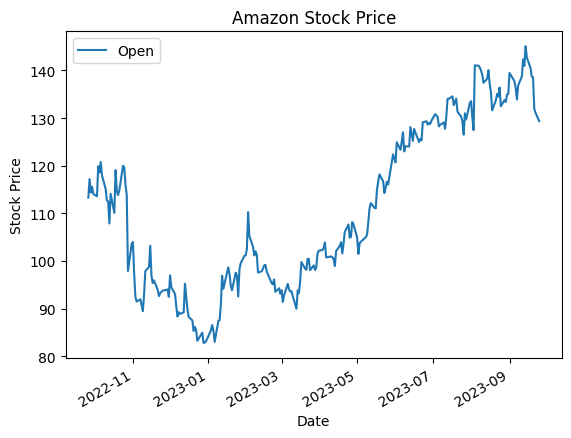

In [19]:
# Plot and show the time series on axis ax1
#fig, ax1 = plt.subplots()
amazon[['Date','Open']].plot('Date', 'Open')
plt.title('Amazon Stock Price')
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.show()

In [30]:
amazon['Date'] = pd.to_datetime(amazon['Date'])

### Train Test Split

In [40]:
amazon_train = amazon[amazon['Date'] < '2023-04-01']

In [41]:
amazon_test = amazon[amazon['Date'] >= '2023-04-01']

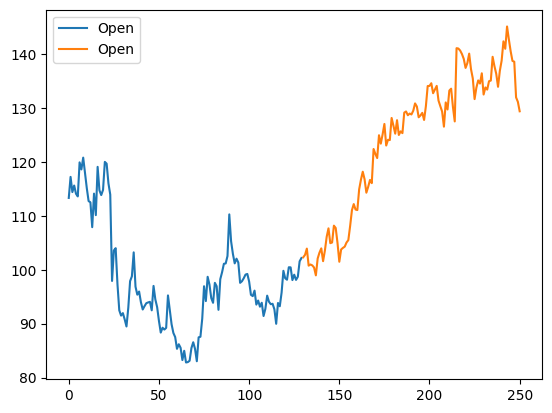

In [52]:
 # Create an axis
fig, ax = plt.subplots()

# Plot the train and test sets on the axis ax
amazon_train[['Open']].plot(ax=ax)
amazon_test[['Open']].plot(ax=ax)
plt.show()


### Dicky-Fuller Test - Tests for trend non-stationary

In [54]:
!pip3.8 install statsmodels --user
from statsmodels.tsa.stattools import adfuller

     |████████████████████████████████| 10.2MB 19.8MB/s eta 0:00:01
     |████████████████████████████████| 235kB 73.6MB/s eta 0:00:01


In [56]:
from statsmodels.tsa.stattools import adfuller

results = adfuller(amazon['Open'])

In [57]:
results

(-0.8911578437813623,
 0.7908703184218668,
 1,
 249,
 {'1%': -3.4568881317725864,
  '5%': -2.8732185133016057,
  '10%': -2.5729936189738876},
 1145.251150131637)

In [ ]:
# first number is the t-statistic, the more negative it is, the ore stationary
# the 2nd number is he p-value, if its is greater than .05, it is still non-stationary
# the tuple stores the crptical value of differnt p values
# ex) if we wanted a p value less than .05, test statistic would need to be less than -2.87

In [58]:
amazon_stationary= amazon['Open'].diff().dropna()

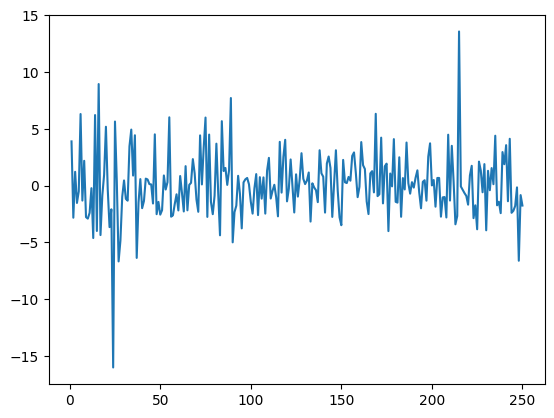

In [59]:
#differenced plot
amazon_stationary.plot()
plt.show()

In [61]:
results = adfuller(amazon_stationary)
#now its stationary
results[1]

2.245957974689822e-30

### Fittting AR and MA Model

In [64]:
from statsmodels.tsa.arima.model import ARIMA
# Instantiate the model
model = ARIMA(amazon['Open'], order=(2,0,0))

# Fit the model
results = model.fit()

# Print summary
print(results.summary())

#note that AR coefficents are negative
#ex) if values for L1 and L2 are .8 and .1 respectively, then AR_coefs = [1,-.8, -.1]

                               SARIMAX Results                                
Dep. Variable:                   Open   No. Observations:                  251
Model:                 ARIMA(2, 0, 0)   Log Likelihood                -618.943
Date:                Tue, 26 Sep 2023   AIC                           1245.885
Time:                        11:42:26   BIC                           1259.987
Sample:                             0   HQIC                          1251.560
                                - 251                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        115.1531     13.786      8.353      0.000      88.134     142.172
ar.L1          0.8420      0.063     13.330      0.000       0.718       0.966
ar.L2          0.1446      0.062      2.321      0.0

### Exogenous variable

In [ ]:
#Exogenous variable: adding an additional independent variable as well as the time series itself
#ARMAX = ARMA + linear regression

#didnt have an additional variable for amazon data

# Instantiate the model
model = ARIMA(hospital['wait_times_hrs'],order=(2,0,1), exog=hospital['nurse_count'])

# Fit the model
results = model.fit()

# Print model fit summary
print(results.summary())

### Forecasting

yt = a1yt-1 + et

#predict the next value
If the previous value was yt=10, and a1 coefficient is .6, then
yt = .6 * 10 + et
yt = 6.0 + et
#uncertainty on prediction
5.0 < yt < 7.0

#the uncertainty is due to the random shock term that we can't predict

### making one step ahead predictions

In [69]:
#make predictions for the last 25 values (how many steps back to begin forecast)

In [82]:
#set to index in the correct format for code
amazon = amazon.set_index('Date')

In [83]:
# Instantiate the model
model = ARIMA(amazon['Open'], order=(2,0,0))

# Fit the model
results = model.fit()

#make in-sample prediction using last 25 values of the training data
forecast = results.get_prediction(start=-25)

#central value of the forecast
mean_forecast = forecast.predicted_mean

#get confidence intervals of forecasts
#in pandas df format
confidence_intervals = forecast.conf_int()

#to make predictions not 1 step ahead, make forecast dynamic

# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:,'lower Open']
upper_limits = confidence_intervals.loc[:,'upper Open']

# Print best estimate  predictions
print(mean_forecast)

Date
2023-08-21    131.953472
2023-08-22    133.183364
2023-08-23    134.618084
2023-08-24    134.323444
2023-08-25    135.839356
2023-08-28    132.805045
2023-08-29    133.339915
2023-08-30    133.192502
2023-08-31    134.439737
2023-09-01    134.773266
2023-09-05    138.496779
2023-09-06    137.676212
2023-09-07    136.238938
2023-09-08    133.997507
2023-09-11    136.139935
2023-09-12    138.159177
2023-09-13    141.438271
2023-09-14    140.800831
2023-09-15    144.080163
2023-09-18    142.664867
2023-09-19    140.458586
2023-09-20    138.640383
2023-09-21    138.256774
2023-09-22    132.669603
2023-09-25    131.015213
Name: predicted_mean, dtype: float64


/home/jmoy001/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/jmoy001/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/jmoy001/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


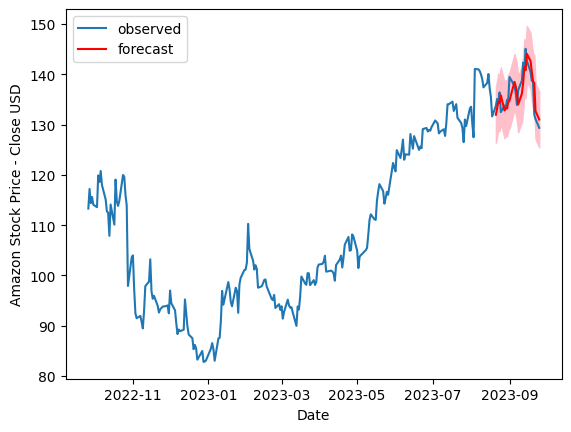

In [84]:
# plot the amazon data
plt.plot(amazon.index, amazon['Open'], label='observed')

# plot your mean predictions
plt.plot(mean_forecast.index, mean_forecast, color='r', label='forecast')

# shade the area between your confidence limits
plt.fill_between(lower_limits.index,lower_limits,
upper_limits, color='pink')

# set labels, legends and show plot
plt.xlabel('Date')
plt.ylabel('Amazon Stock Price - Close USD')
plt.legend()
plt.show()

### Dynamic Forecast - want to predict not just for tomorrow, but for next week or month

In [86]:
# Instantiate the model
model = ARIMA(amazon['Open'], order=(2,0,0))

# Fit the model
results = model.fit()

# Generate predictions
dynamic_forecast = results.get_prediction(start=-30, dynamic=True)

# Extract prediction mean
mean_forecast = dynamic_forecast.predicted_mean

# Get confidence intervals of predictions
confidence_intervals = dynamic_forecast.conf_int()

# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:,'lower Open']
upper_limits = confidence_intervals.loc[:,'upper Open']

# Print best estimate predictions
print(mean_forecast.values)

[137.34197828 137.05171231 136.79892742 136.54412661 136.29304673
 136.04480837 135.79950041 135.55707057 135.31748766 135.08071787
 134.84672823 134.61548609 134.38695918 134.16111562 133.9379239
 133.71735289 133.49937182 133.28395027 133.07105819 132.86066588
 132.65274398 132.4472635  132.24419576 132.04351242 131.84518551
 131.64918734 131.45549057 131.26406818 131.07489346 130.88794002]


/home/jmoy001/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/jmoy001/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/jmoy001/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


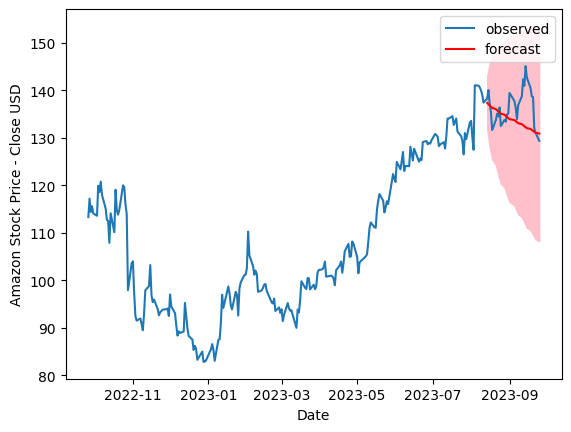

In [87]:
# plot the amazon data
plt.plot(amazon.index, amazon['Open'], label='observed')

# plot your mean forecast
plt.plot(mean_forecast.index, mean_forecast, color='r', label='forecast')

# shade the area between your confidence limits
plt.fill_between(lower_limits.index, lower_limits, 
         upper_limits, color='pink')

# set labels, legends and show plot
plt.xlabel('Date')
plt.ylabel('Amazon Stock Price - Close USD')
plt.legend()
plt.show()

### Forecasting using ARIMA 
- In order to use arima, time series must be stationary. However, interesting time series are non-stationary.
- to get the data stationary, must take difference (other ways too) to get the data stationary. And you would check using the dicky-fuller test
- Once you apply arima to generate the forecast, the forecast is based on the differenced data. Would need to take the cumulative sum to revert it back and apply to non-stationary data

### The long way: Differencing and fitting ARMA

In [89]:
# Take the first difference of the data
amazon_diff = amazon['Open'].diff().dropna()

# Create ARMA(2,2) model
arma = ARIMA(amazon_diff, order=(2,0,2))

# Fit model
arma_results = arma.fit()

# Print fit summary
print(arma_results.summary())

                               SARIMAX Results                                
Dep. Variable:                   Open   No. Observations:                  250
Model:                 ARIMA(2, 0, 2)   Log Likelihood                -615.441
Date:                Tue, 26 Sep 2023   AIC                           1242.883
Time:                        13:19:33   BIC                           1264.011
Sample:                             0   HQIC                          1251.386
                                - 250                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0641      0.157      0.408      0.684      -0.244       0.372
ar.L1         -0.0691      3.141     -0.022      0.982      -6.225       6.087
ar.L2          0.1006      0.336      0.299      0.7

/home/jmoy001/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/jmoy001/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/jmoy001/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/jmoy001/.local/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary st

In [93]:
# Make arma forecast of next 10 differences
arma_diff_forecast = arma_results.get_forecast(steps=10).predicted_mean

# Integrate the difference forecast to get back in original format
arma_int_forecast = np.cumsum(arma_diff_forecast)

# Make absolute value forecast by adding back original value (differencing removed this)
arma_value_forecast = arma_int_forecast + amazon.iloc[-1,0]

# Print forecast
print(arma_value_forecast)

250    129.865645
251    129.957459
252    130.064044
253    130.127984
254    130.196358
255    130.260136
256    130.324678
257    130.388705
258    130.452844
259    130.516924
Name: predicted_mean, dtype: float64


/home/jmoy001/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


### ARIMA the easy way - having statsmodel do the heavy lifting

In [94]:
# Create ARIMA(2,1,2) model
arima = ARIMA(amazon['Open'], order=(2,1,2))

# Fit ARIMA model
arima_results = arima.fit()

# Make ARIMA forecast of next 10 values
arima_value_forecast = arima_results.get_forecast(steps=10).predicted_mean

# Print forecast
print(arima_value_forecast)

251    129.769395
252    129.790003
253    129.824463
254    129.823848
255    129.826913
256    129.826644
257    129.826932
258    129.826888
259    129.826916
260    129.826910
Name: predicted_mean, dtype: float64


/home/jmoy001/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/jmoy001/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/jmoy001/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/jmoy001/.local/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary st

### Intro to ACF and PACF
- Model order is very important to the quality of the forecast
- One of the main ways to identify the correct model order is by using the ACF (AutoCorrelation Function) and PACF (Partial AutoCorrelation Function)
- lag 1 correlation of itself and previous step
- ideally, the ACF for lag 1 and onward should be outside of the blue shaded region, showing how correlated the initial ts value is with its future values
- PACF is the correlation between a time series of itself and the lagged version of itself after we subtract the effect of correlation at smaller lags
- thus, correlation associated with just that particular lag

### Using the ACF and PACF, we can determine the model order
- need to look at it fully, but basically whether it tails off or cuts after lag p or q

In [ ]:
#ex)

# Create figure
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))

# Plot ACF and PACF
plot_acf(earthquake, lags=10, zero=False, ax=ax1)
plot_pacf(earthquake, lags=10, zero=False, ax=ax2)

# Show plot
plt.show()

# Instantiate model
model = ARIMA(earthquake, order=(1,0,0))

# Train model
results = model.fit()

In [ ]:
### Intro to AIC and BIC
- BIC favors simplier models than AIC
- AIC is better at choosing predictive models
- BIC is better at choosing good explanatory models

In [ ]:
#ex)

# Loop over p values from 0-2
for p in range(0,3):
    # Loop over q values from 0-2
    for q in range(0,3):
      
        try:
            # create and fit ARMA(p,q) model
            model = ARIMA(earthquake, order=(p, 0, q))
            results = model.fit()
            
            # Print order and results
            print(p, q, results.aic, results.bic)
            
        except:
            print(p, q, None, None)     

### Model Diagnostics - verify model is behaving well and how good it is
- focus on residuals
- residuals should look like white noise

/home/jmoy001/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/jmoy001/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/jmoy001/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


2.0374229419024354


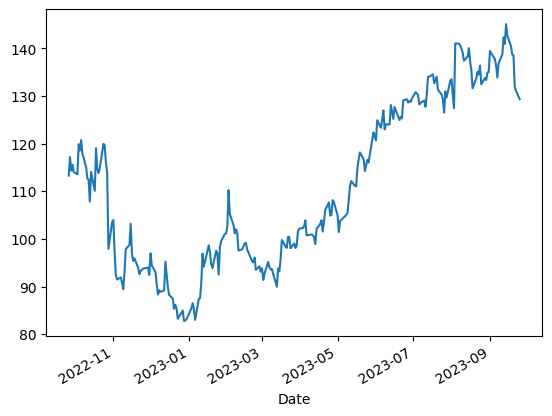

In [98]:
# Fit model
model = ARIMA(amazon['Open'], order=(1,0,1))
results = model.fit()

# Calculate the mean absolute error from residuals
mae = np.mean(np.abs(results.resid))

# Print mean absolute error
print(mae)

# Make plot of time series for comparison
amazon['Open'].plot()
plt.show()

In [ ]:
#prob(Q) is smaller than .05, we should reject the null that the residuals are uncorrelated
#prob(JB) is smaller than .05, we should reject the null that the residuals are normally distributed. Thus, resideuals are normally distributed

/home/jmoy001/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/jmoy001/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/jmoy001/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


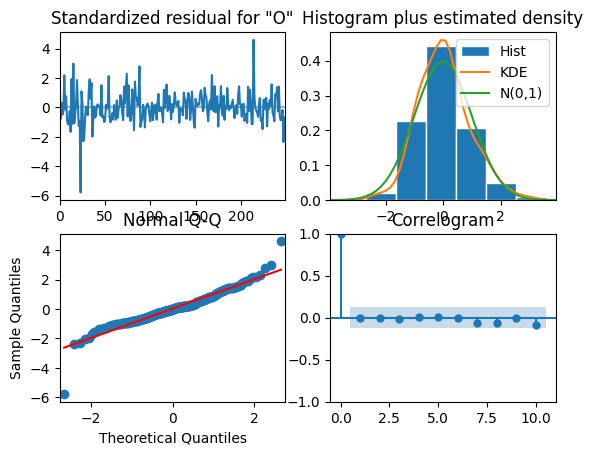

In [101]:
# Create and fit model
model = ARIMA(amazon['Open'], order=(1,1,1))
results = model.fit()

# Create the 4 diagnostics plots
#Standardized Residual plot (1 step ahead), should have no obvious pattern
#Histogram: orange and green line should be close to the same
#Q-Q plot: distribution of model residuals comparing to normal distribution. points should follow a stright line
#Correlogram: should be within blue span. otherwise, not capturing all information

#Prob(Q) - p value for null hypothesis that residuals are uncorrelated
#Prob(JB) - p value for null hyopthesis that residuals are normal

#residuals should be normally distributed

results.plot_diagnostics()
plt.show()

### Box Jenkins Method
- .fit() performs finding out numerical methods to estimate the AR and MA coefficients of the data

### Seasonal Time Series
- regular cycle that repeats
#### Composed of 3 parts
- trend
- seasonal component
- residual

#### Time series = trend + seasonal component + residual
- to decompose time series, need to know when cycle repeats
- 12 = 1 year
- Usually you can guess this based on graphing time series. Otherwise, can use ACF to identify time period
- Would be a lag close to lag 0 in correlation since it repeats itself

#### Detrending time series
- detrend time series before by taking the difference
- However, this time, we are only trying to find the period of time series
- ACF plot will be clearer if we subtract the rolling mean
- Since the data is seasonal, will always have correlated residuals

In [ ]:
# Import seasonal decompose
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform additive decomposition
decomp = seasonal_decompose(milk_production['pounds_per_cow'], 
                            period=12)

# Plot decomposition
decomp.plot()
plt.show()

In [ ]:
# Create figure and subplot
fig, ax1 = plt.subplots()

# Plot the ACF on ax1
plot_acf(water['water_consumers'], lags=25, zero=False,  ax=ax1)

# Show figure
plt.show()

In [ ]:
# Subtract the rolling mean
water_2 = water - water.rolling(15).mean()

# Drop the NaN values
water_2 = water_2.dropna()

# Create figure and subplots
fig, ax1 = plt.subplots()

# Plot the ACF
plot_acf(water_2['water_consumers'], lags=25, zero=False, ax=ax1)

# Show figure
plt.show()

### Seasonal ARIMA = SARIMA
- fitting a SARIMA model is like fitting two different ARIMA models (seasonal and non-seasonal portion)

#### Non-seasonal order
- p: autoregressive order
- d: differencing order
- q: moving average order

#### Seasonal order
- p: seasonal autoregressive order
- d: seasonal differencing order
- q: seasonal moving average order
- s: number of time steps per cycle

#### Differencing
- if there is a trend, take the normal difference
- if there is a seasonal trend, take the seasonal difference (difference by repeated cycle)

- To find the non-seasonal orders, we plot the ACF and PACF of the differenced time series
- To find the seasonal orders we plot the ACF and PACF of the differenced time series at multiple seasonal steps

In [ ]:
### SARIMA vs ARIMA Forecast
#- test both to see how it performs to observed data

#Two models, an ARIMA(3,1,2) and a SARIMA(0,1,1)(1,1,1)
#, have been fit to the Wisconsin employment time series. These were the best ARIMA model and the best SARIMA model available according to the AIC.

#In the exercise you will use these two models to make dynamic future forecast for 25 months and plot these predictions alongside held out data for this period, wisconsin_test.

# Create ARIMA mean forecast
arima_pred = arima_results.get_forecast(25)
arima_mean = arima_pred.predicted_mean

# Create SARIMA mean forecast
sarima_pred = sarima_results.get_forecast(25)
sarima_mean = sarima_pred.predicted_mean

# Plot mean ARIMA and SARIMA predictions and observed
plt.plot(dates, sarima_mean, label='SARIMA')
plt.plot(dates, arima_mean, label='ARIMA')
plt.plot(wisconsin_test, label='observed')
plt.legend()
plt.show()

### Searching over model order
- We did a for loop for non-seasonal, but will be harder for seasonal search 
- But there is a package that will make it easier
- import pmdarima as pm
- results = pm.auto_arima(df)
- print(results.summary())
- results.plot_diagnostics()


#### Setting initial parameters (optional)
results = pm.auto_arima(df, #data
                        d=0, #non-seasonal difference order
                        start_p=1, #initial guess for p
                        start_q=1, #initial guess for q
                        max_p=3, #max value of p for test
                        max_q=3, #max value for q to test
                        )
                        
#### Setting initial parameters for Seasonal ARIMA (optional)
results = pm.auto_arima(df, #data
                        ...., #non seasonal arguments
                        seasonal=True, #is the time series seasonal
                        m=7, #the seasonal period
                        D=0, seasonal difference order
                        start_P=1, #initial guess for p
                        start_Q=1, #initial guess for q
                        max_P=3, #max value of p for test
                        max_Q=3, #max value for q to test
                        )
                        
#### Other Parameters
results. pm.auto_arima(df, #data
                        ...., #model order parameters
                        information_criterion='aic', #used to select best model
                        trace=True, #print results whilst training
                        error_action=True, #ignore orders that dont work. Similar to setting try except code block
                        stepwise=True, #apply intelligent order search
                        )

### Box-Jenkins with Seasonal Data
- determine if time series is seasonal
- find seasonal period
- find transforms to make seasonal time series stationary via seasonal differencing (difference by each cycle) or non seasonal differencing

### Rules of Thumb
- seasonal differencing should be 0-1
- d + D should be 0-2

### Should use log transformation if you notice a multiplicative transformation


In [ ]:
#code used to plot subplots 

# Plot the time series in each dataset
fig, axs = plt.subplots(2, 1, figsize=(5, 10))
data.iloc[:1000].plot(x='time', y='data_values', ax=axs[0])
data2.iloc[:1000].plot(x='time', y='data_values', ax=axs[1])
plt.show()

In [ ]:
### plot each column

# Read in the data
data = pd.read_csv('prices.csv', index_col=0)

# Convert the index of the DataFrame to datetime
data.index = pd.to_datetime(data.index)
print(data.head())

# Loop through each column, plot its values over time
fig, ax = plt.subplots()
for column in data.columns:
    data[column].plot(ax=ax, label=column)
ax.legend()
plt.show()

In [ ]:
from sklearn.svm import LinearSVC

# Initialize and fit the model
model = LinearSVC()
model.fit(X_train, y_train)

# Generate predictions and score them manually
predictions = model.predict(X_test)
print(sum(predictions == y_test.squeeze()) / len(y_test))

In [ ]:
### Rolling Mean

# Smooth by applying a rolling mean
audio_rectified_smooth = audio_rectified.rolling(50).mean()

# Plot the result
audio_rectified_smooth.plot(figsize=(10, 5))
plt.show()

In [ ]:
### feature engineering

# Calculate stats
means = np.mean(audio_rectified_smooth, axis=0)
stds = np.std(audio_rectified_smooth, axis=0)
maxs = np.max(audio_rectified_smooth, axis=0)

# Create the X and y arrays
X = np.column_stack([means, stds, maxs])
y = labels.reshape(-1, 1)

# Fit the model and score on testing data
from sklearn.model_selection import cross_val_score
percent_score = cross_val_score(model, X, y, cv=5)
print(np.mean(percent_score))